In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
df = pd.read_csv("../data/connect-4.tsv",delimiter='\t')
X = df.iloc[:,:-1].to_numpy().astype("float")
y = df.iloc[:,-1].to_numpy().astype("int")

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
train_size = 0.7
dataset = 'connect-4'

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [9]:
def fit_trees(tolerance = 0.001,max_nodes=1000):
    learning_rate=1
    max_depth=6
    bins=5
    lam=10

    gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

    total_size=10
    elite_size = 3
    epoch= 100
    gp_epoch= 3
    verbose = 1

    # gtgp.fit_fixed_number(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,max_nodes=max_nodes,verbose=verbose)
    gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

    # retrain_epoch= max(3000//sum([tree.numNode for tree in gtgp.stack]),1)
    retrain_epoch = 2

    alpha=0
    beta=1
    gammer=0

    verbose=1
    gtgp.lam = 10
    # gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

    return gtgp


test_sses = []
test_accs = []

avg_nodes = []

tors = [0,1e-12,1e-8,1e-4]
# tors = [1e-4]
for t in tors:
    test_sse = []
    test_acc = []
    nodes = []

    for i in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
        y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

        gtgp = fit_trees(tolerance=t,max_nodes=1000)
        nodes.append(gtgp.num_nodes)
        # test_sse.append(gtgp.test_sse)
        # test_acc.append(gtgp.test_acc)
    # min_epoch = min([len(t) for t in test_acc])
    avg_nodes.append(np.average(nodes))
    # test_sses.append(test_sse)
    # test_accs.append(test_acc)

9 31 1
18 62 2
27 91 3
36 128 4
45 155 5
54 184 6
63 217 7
72 246 8
81 275 9
90 302 10
99 335 11
108 364 12
117 399 13
126 430 14
135 457 15
144 486 16
153 517 17
162 548 18
171 577 19
180 608 20
189 639 21
198 666 22
207 701 23
216 734 24
225 763 25
234 796 26
243 825 27
252 858 28
261 887 29
270 918 30
279 953 31
288 982 32
297 1011 33
306 1042 34
315 1071 35
324 1100 36
333 1127 37
342 1156 38
351 1191 39
360 1220 40
369 1253 41
378 1288 42
387 1321 43
396 1352 44
405 1381 45
414 1410 46
423 1439 47
432 1468 48
441 1511 49
450 1538 50
459 1567 51
468 1596 52
477 1629 53
486 1660 54
495 1689 55
504 1720 56
513 1747 57
522 1774 58
531 1801 59
540 1828 60
549 1855 61
558 1888 62
567 1921 63
576 1950 64
585 1977 65
594 2008 66
603 2035 67
612 2066 68
621 2093 69
630 2126 70
639 2157 71
648 2186 72
657 2215 73
666 2244 74
675 2275 75
684 2304 76
693 2331 77
702 2364 78
711 2397 79
720 2434 80
729 2463 81
738 2496 82
747 2533 83
756 2560 84
765 2589 85
774 2622 86
783 2651 87
792 2688 88


In [ ]:
[t.shape for t in test_sses]

[(288,), (286,), (284,), (286,), (288,)]

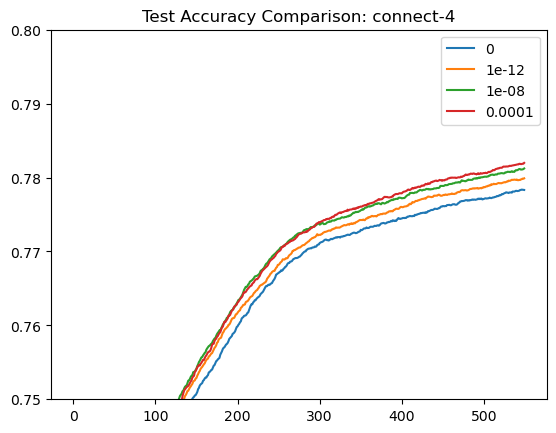

In [30]:
length = 550
test_acc_avgs = []
for t in test_accs:
    avg = []
    for i in range(length):
        avg.append(np.average([x[i] for x in t]))
    test_acc_avgs.append(avg)

for i in range(len(test_acc_avgs)):
    plt.plot(test_acc_avgs[i])
    # plt.plot(test_sses[i][:min_epoch])

# plt.yscale('log')
plt.title("Test Accuracy Comparison: "+dataset)
plt.ylim(0.75,0.8)
plt.legend(tors[:len(test_sses)])
plt.show()


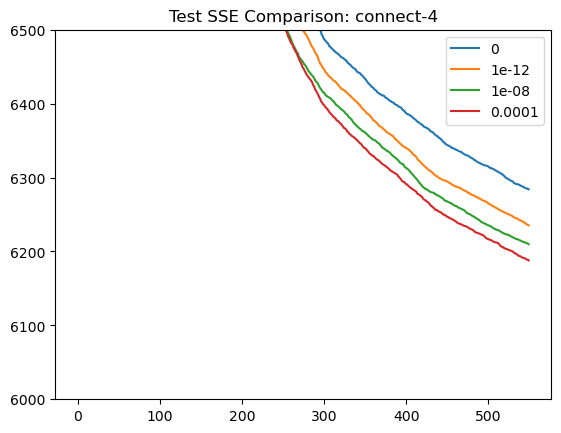

In [31]:
length = 550
test_sse_avg = []
for t in test_sses:
    avg = []
    for i in range(length):
        avg.append(np.average([x[i] for x in t]))
    test_sse_avg.append(avg)

for i in range(len(test_sse_avg)):
    plt.plot(test_sse_avg[i])
    # plt.plot(test_sses[i][:min_epoch])

# plt.yscale('log')
plt.title("Test SSE Comparison: "+dataset)
plt.ylim(6000,6500)
plt.legend(tors[:len(test_sses)])
plt.show()
